In [30]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [31]:
data = pd.read_csv("https://raw.githubusercontent.com/mikvyork/schulich_data_science/refs/heads/main/mmai500_proposal/Data-ATP-W119-PEW.csv")

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\940540470.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/mikvyork/schulich_data_science/refs/heads/main/mmai500_proposal/Data-ATP-W119-PEW.csv")


In [32]:
# ------------------------- EDA ------------------------- # 
data.head() 

,QKEY,INTERVIEW_START_W119,INTERVIEW_END_W119,DEVICE_TYPE_W119,LANG_W119,FORM_W119,DESRISK_COMF_W119,DESRISK_CREAT_W119,DESRISK_NTECH_W119,RISK2_W119,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_REG,F_INC_SDT1,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W119
0,100314,12/13/2022 23:12:27,12/13/2022 23:23:59,2,1,1,4,3,4,2,...,,1,1,1,4,2,5,1,2,0.522544
1,100363,12/13/2022 19:50:59,12/13/2022 20:05:29,2,1,2,3,3,2,1,...,,2,3,1,9,3,2,1,3,0.382610
2,100598,12/14/2022 16:30:21,12/14/2022 16:47:21,1,1,1,4,4,3,2,...,,1,1,1,9,2,2,1,3,0.432799
3,100637,12/14/2022 08:22:09,12/14/2022 08:33:45,1,1,2,2,1,3,2,...,1,1,1,1,5,2,3,2,2,0.671114
4,100803,12/15/2022 09:05:46,12/15/2022 09:22:29,1,1,2,3,3,4,1,...,,1,1,1,9,2,4,1,3,0.196177


In [33]:
data.describe()

,QKEY,DEVICE_TYPE_W119,LANG_W119,FORM_W119,DESRISK_COMF_W119,DESRISK_CREAT_W119,DESRISK_NTECH_W119,RISK2_W119,AI_HEARD_W119,CNCEXC_W119,...,F_RELIG,F_RELIGCAT1,F_ATTEND,F_PARTY_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_IDEO,F_VOLSUM,WEIGHT_W119
count,1.100400e+04,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,...,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000
mean,1.772323e+11,1.677027,1.039804,1.499182,2.989549,2.391130,2.582697,2.383588,1.911123,3.113413,...,5.228553,2.670029,4.390858,3.019538,1.740912,2.729008,10.047801,4.810251,1.882134,1.000000
std,6.611107e+10,0.524606,0.195507,0.500022,2.593657,2.431065,2.788196,9.631999,2.688112,8.834480,...,8.846445,7.884602,5.301660,9.056001,1.337942,1.732756,20.467926,13.402154,5.185202,1.150309
min,1.003140e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.008109
25%,2.018010e+11,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.397223
50%,2.018012e+11,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,5.000000,2.000000,2.000000,3.000000,6.000000,3.000000,2.000000,0.634431
75%,2.020010e+11,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,...,10.000000,3.000000,6.000000,3.000000,2.000000,4.000000,9.000000,4.000000,2.000000,1.093206
max,2.022011e+11,3.000000,2.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,7.195378


In [34]:
data.columns

Index(['QKEY', 'INTERVIEW_START_W119', 'INTERVIEW_END_W119',
       'DEVICE_TYPE_W119', 'LANG_W119', 'FORM_W119', 'DESRISK_COMF_W119',
       'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119',
       ...
       'F_PARTYLN_FINAL', 'F_PARTYSUM_FINAL', 'F_PARTYSUMIDEO_FINAL', 'F_REG',
       'F_INC_SDT1', 'F_IDEO', 'F_INTFREQ', 'F_VOLSUM', 'F_INC_TIER2',
       'WEIGHT_W119'],
      dtype='object', length=156)

In [35]:
# ------------------------- FEATURE ENGINEERING  ------------------------- # 

# AI_AWARENESS COMPOSITE 
data['SCORES'] = data[['AIKNOW_INDEX_W119', 'AIWRKM1_W119', 'FACERECWK1_W119', 'AI_HEARD_W119']].mean(axis=1)
print(data['SCORES'].describe())  

count    11004.000000
mean         3.103849
std          3.786386
min          0.750000
25%          2.250000
50%          2.750000
75%          3.000000
max         51.500000
Name: SCORES, dtype: float64


In [36]:
# AI_ADAPTABILITY INDEX 
mapping_aiwrk3b = {1: 2, 2: 1, 3: 0}
data['adapt_ntech'] = (6 - data['DESRISK_NTECH_W119']) / 5  # 0 = low comfort, 1 = high comfort
data['adapt_aiwrk3b_new'] = data['AIWRK3_b_W119'].map(mapping_aiwrk3b) / 2 # Normalize to 0-1 scale
data['adapt_aiwrkh4'] = data['AIWRKH4_W119'].apply(lambda x: 1 if x == 1 else 0)  # 1 = willing, 0 = unwilling 

data['adaptability_index_new'] = (data['adapt_ntech'] +
                                            data['adapt_aiwrk3b_new'] +
                                            data['adapt_aiwrkh4']) / 3

threshold_new = data['adaptability_index_new'].median()
data['adaptability_binary_new'] = (data['adaptability_index_new'] >= threshold_new).astype(int)

In [37]:
# ------------------------- ANALYSIS SETUP ------------------------- # 

master_dataset = data[['F_GENDER', 'F_EDUCCAT', 'F_RACECMB', 'F_AGECAT','EMPLSIT_W119','JOBAPPYR_W119','INDUSTRYCOMBO_W119', 
                     'AIKNOW_INDEX_W119', 'QKEY', 'AIWRKH4_W119','AIWRKM1_W119','FACERECWK1_W119', 'AI_HEARD_W119','AIWRK3_b_W119',
                     'DESRISK_NTECH_W119','CNCEXC_W119']].copy() 

# ----- DATA CLEAN CHECK ---- #
print("Duplicates\n",master_dataset['QKEY'].duplicated().sum(),"\n")
print(master_dataset.isnull().sum(),"\n")
print(master_dataset.isna().sum(),"\n")
print(master_dataset['F_GENDER'].value_counts())

# ----- OUTLIERS ---- #
print("Outlier Check\n",(master_dataset == 99).sum(),"\n")
master_dataset = master_dataset[~(master_dataset == 99).any(axis=1)] 
master_dataset['AIWRK3_b_W119'] = master_dataset['AIWRK3_b_W119'].replace(9, 3)
master_dataset = master_dataset[~(master_dataset['F_GENDER'] == 3)] 

# Replace blank strings with NaN (this step is correct)
master_dataset['INDUSTRYCOMBO_W119'] = master_dataset['INDUSTRYCOMBO_W119'].replace(' ', np.nan)

# THE FIX: Instead of dropping, fill the NaN values with a placeholder
master_dataset['INDUSTRYCOMBO_W119'].fillna('Not Applicable', inplace=True)

# Now, when you check the unique values of EMPLSIT_W119, they will all be present
print("Unique values in 'EMPLSIT_W119' after the fix:")
print(sorted(master_dataset['EMPLSIT_W119'].unique()))

# You can also check the value counts for the industry column to see your new category
print("\nValue counts for 'INDUSTRYCOMBO_W119' including the new category:")
print(master_dataset['INDUSTRYCOMBO_W119'].value_counts())

# ------------------------- MAPPING ------------------------- #
agecat = {1: "18-29", 2:"30-49", 3:"50-64", 4 :"65+"}
education = {1: "College Graduate+", 2:"Some College", 3:"H.S Graduate or less"}
gender = {1:"Male", 2:"Female"}
race = {1:"White", 2:"Black or Black American", 3:"Asian or Asian American", 4:"Mixed", 5:"Other"}
applied_job = {1:"Yes", 2:"No"}
awareness_maps = {1: 3, 2: 2, 3: 0}

mapping_dicts = {
    'F_AGECAT': agecat,
    'F_EDUCCAT': education,
    'F_GENDER': gender,
    'F_RACECMB': race,
    'JOBAPPYR_W119': applied_job,
    'AIWRKM1_W119': awareness_maps,
    'FACERECWK1_W119': awareness_maps, 
    'AI_HEARD_W119': awareness_maps,
}

for col, mapping in mapping_dicts.items():
    master_dataset[col] = master_dataset[col].map(mapping)

mapping_aiwrk3b = {1: 2, 2: 1, 3: 0}
master_dataset['adapt_ntech'] = (6 - master_dataset['DESRISK_NTECH_W119']) / 5  # 0 = low comfort, 1 = high comfort
master_dataset['adapt_aiwrk3b_new'] = master_dataset['AIWRK3_b_W119'].map(mapping_aiwrk3b) / 2 # Normalize to 0-1 scale
master_dataset['adapt_aiwrkh4'] = master_dataset['AIWRKH4_W119'].apply(lambda x: 1 if x == 1 else 0)  # 1 = willing, 0 = unwilling

# --- 1. Define the mapping from numbers to industry names ---
industry_combo_map = {
    1: "Hospitality", 2: "Health Care", 3: "Mining/Construction",
    4: "Retail", 5: "Education", 6: "Finance",
    7: "Transportation", 8: "Government", 9: "Information",
    10: "Agriculture", 11: "Scientific Services", 12: "Arts",
    13: "Other"
}

# --- 2. THE FIX: Convert the column to a numeric type first ---
# errors='coerce' will turn any non-numeric values (like spaces) into NaN
master_dataset['INDUSTRYCOMBO_W119'] = pd.to_numeric(master_dataset['INDUSTRYCOMBO_W119'], errors='coerce')


# --- 3. Apply the mapping to create a column of industry names ---
# Now this will work correctly because the data types match
master_dataset['Industry_Name'] = master_dataset['INDUSTRYCOMBO_W119'].map(industry_combo_map)


# --- 4. Handle any remaining missing values ---
master_dataset['Industry_Name'].fillna('Not Applicable', inplace=True)


# --- 5. Display the result to verify ---
print("Mapping complete. The 'Industry_Name' column should now be correctly populated.")
print(master_dataset['Industry_Name'].value_counts())

# COMPOSITE FEATURE ENGINEERING 
# SCORES 
master_dataset['SCORES'] = master_dataset[['AIKNOW_INDEX_W119', 'AIWRKM1_W119', 'FACERECWK1_W119', 'AI_HEARD_W119']].sum(axis=1)
print(master_dataset['SCORES'].describe())

# Create ADAPT_SCORE
master_dataset['adaptability_index_new'] = (master_dataset['adapt_ntech'] +
                                           master_dataset['adapt_aiwrk3b_new'] +
                                           master_dataset['adapt_aiwrkh4']) / 3

# Finally, recreate the target variable 'y' based on this improved index
threshold_new = master_dataset['adaptability_index_new'].median()
master_dataset['adaptability_binary_new'] = (master_dataset['adaptability_index_new'] >= threshold_new).astype(int)

Duplicates
 0 

F_GENDER              0
F_EDUCCAT             0
F_RACECMB             0
F_AGECAT              0
EMPLSIT_W119          0
JOBAPPYR_W119         0
INDUSTRYCOMBO_W119    0
AIKNOW_INDEX_W119     0
QKEY                  0
AIWRKH4_W119          0
AIWRKM1_W119          0
FACERECWK1_W119       0
AI_HEARD_W119         0
AIWRK3_b_W119         0
DESRISK_NTECH_W119    0
CNCEXC_W119           0
dtype: int64 

F_GENDER              0
F_EDUCCAT             0
F_RACECMB             0
F_AGECAT              0
EMPLSIT_W119          0
JOBAPPYR_W119         0
INDUSTRYCOMBO_W119    0
AIKNOW_INDEX_W119     0
QKEY                  0
AIWRKH4_W119          0
AIWRKM1_W119          0
FACERECWK1_W119       0
AI_HEARD_W119         0
AIWRK3_b_W119         0
DESRISK_NTECH_W119    0
CNCEXC_W119           0
dtype: int64 

F_GENDER
2     5993
1     4884
3       96
99      31
Name: count, dtype: int64
Outlier Check
 F_GENDER               31
F_EDUCCAT              31
F_RACECMB             161
F_AGECAT      

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\3652306125.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  master_dataset['INDUSTRYCOMBO_W119'].fillna('Not Applicable', inplace=True)
C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\3652306125.py:80: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

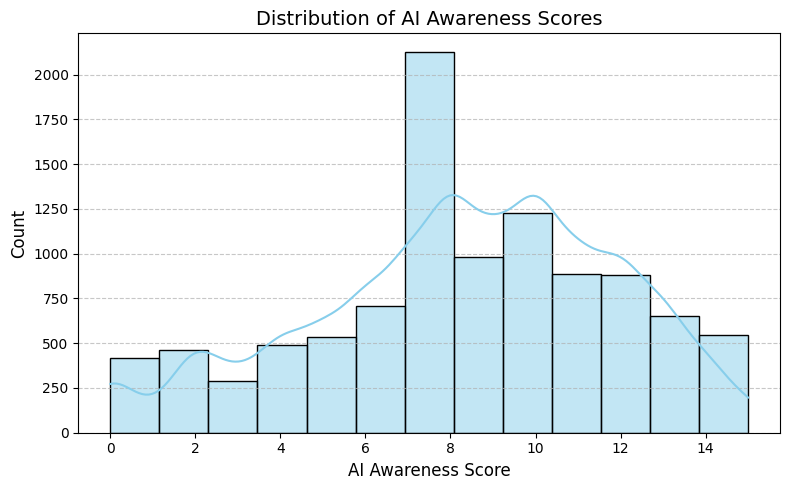

In [38]:
# ------------------------- UNIVARIATE ANALYSIS ------------------------- # 

# SCORE DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.histplot(master_dataset['SCORES'], bins=13, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of AI Awareness Scores', fontsize=14)
plt.xlabel('AI Awareness Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

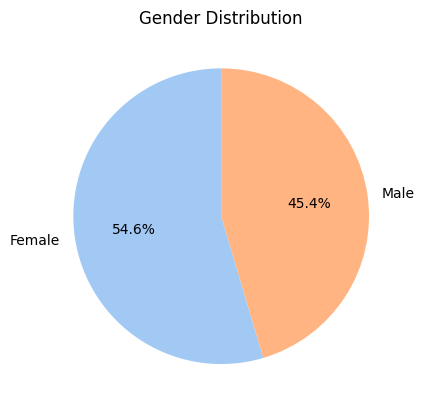

In [39]:
# GENDER PIE CHART
master_dataset['F_GENDER'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2796170865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='F_AGECAT', data=master_dataset, order=sorted(master_dataset['F_AGECAT'].unique()), palette='Set2')


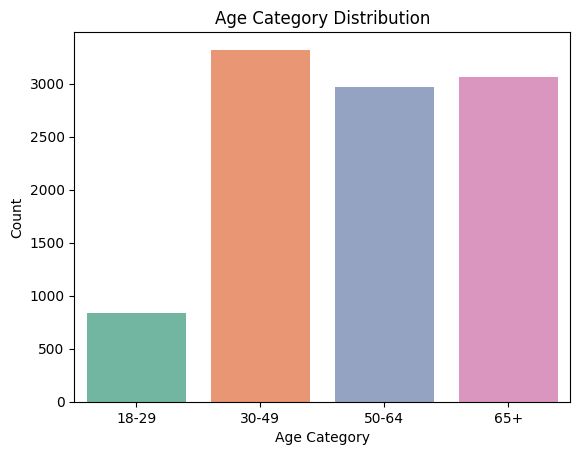

In [40]:
# AGE CAT DISTRIBUTION
sns.countplot(x='F_AGECAT', data=master_dataset, order=sorted(master_dataset['F_AGECAT'].unique()), palette='Set2')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\993718788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


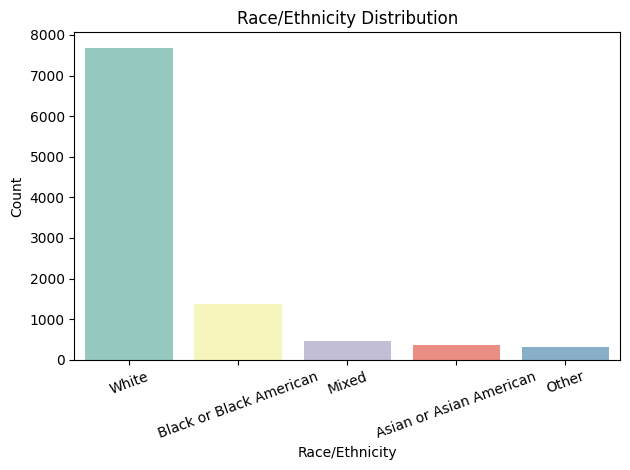

In [41]:
# RACECMB DISTRIBUTION
sns.countplot(
    x='F_RACECMB',
    data=master_dataset,
    order=master_dataset['F_RACECMB'].value_counts().index,
    palette='Set3'
)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Race/Ethnicity Distribution')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\1032337059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="F_EDUCCAT", data=master_dataset, palette='viridis')


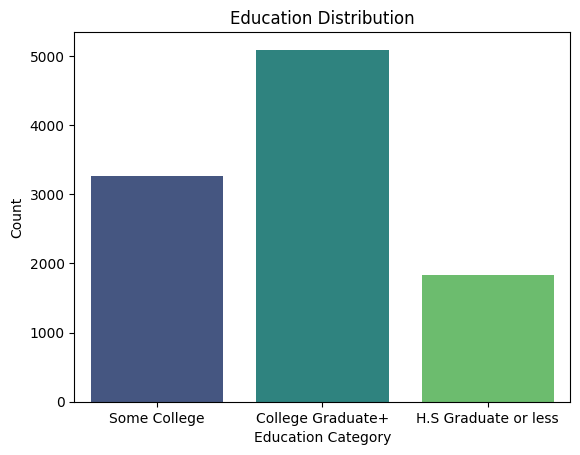

In [42]:
# EDUCATION DISTRIBUTION 
sns.countplot(x="F_EDUCCAT", data=master_dataset, palette='viridis')
plt.title("Education Distribution")
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\1403347382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='EMPLSIT_W119', data=master_dataset, palette='coolwarm')


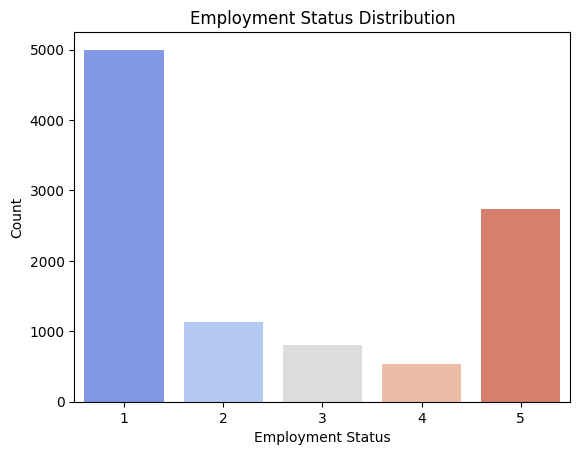

In [43]:
# Employment Distribution with color palette
sns.countplot(x='EMPLSIT_W119', data=master_dataset, palette='coolwarm')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2963692725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_EDUCCAT', y='SCORES', data=avg_education, palette='viridis')


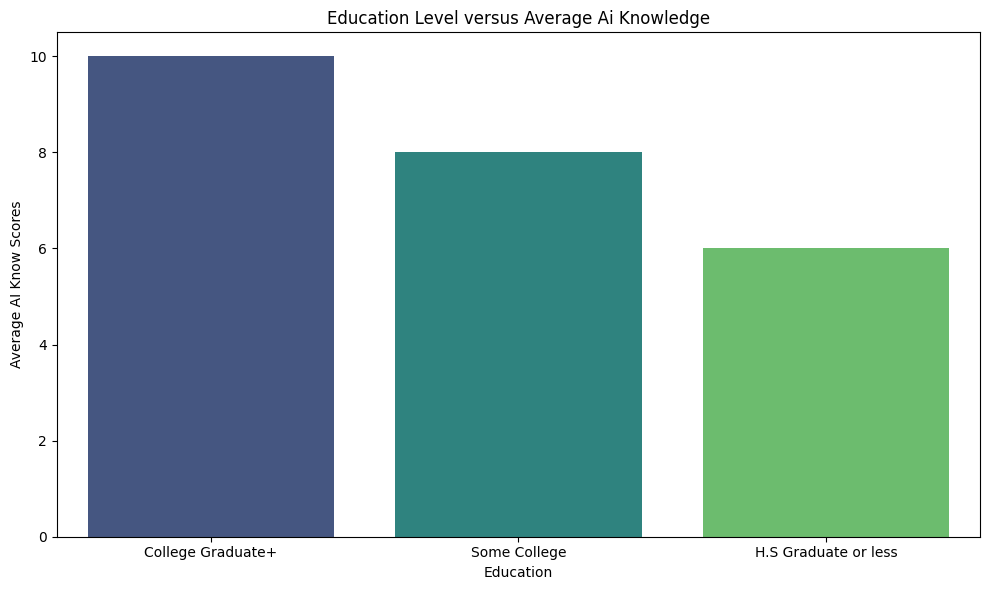

In [44]:
# ------------------------- BIVARIATE ANALYSIS ------------------------- # 
# Education vs AIKNOW_INDEX_W119
avg_education = master_dataset.groupby('F_EDUCCAT')['SCORES'].median().sort_values(ascending=False).reset_index() 
plt.figure(figsize=(10, 6))
sns.barplot(x='F_EDUCCAT', y='SCORES', data=avg_education, palette='viridis')
plt.title('Education Level versus Average Ai Knowledge')
plt.xlabel('Education')
plt.ylabel('Average AI Know Scores')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\1083333790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_AGECAT', y='SCORES', data=avg_age_score, palette='viridis')


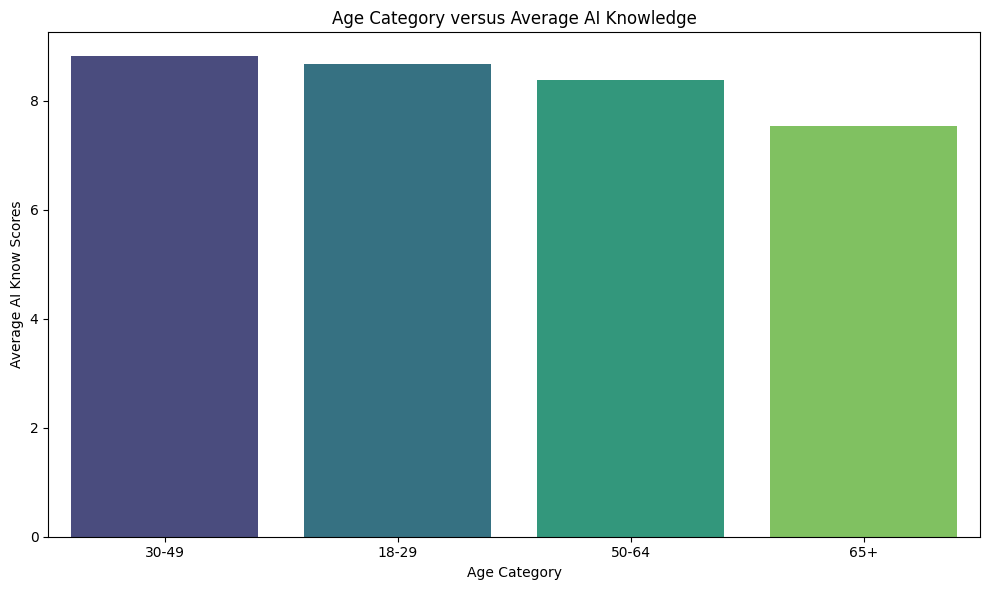

In [45]:
# AgeCat vs AIKNOW_INDEX_W119
avg_age_score = master_dataset.groupby('F_AGECAT')['SCORES'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='F_AGECAT', y='SCORES', data=avg_age_score, palette='viridis')
plt.title('Age Category versus Average AI Knowledge')
plt.xlabel('Age Category')
plt.ylabel('Average AI Know Scores')
plt.tight_layout()
plt.show()

In [46]:
master_dataset.columns

Index(['F_GENDER', 'F_EDUCCAT', 'F_RACECMB', 'F_AGECAT', 'EMPLSIT_W119',
       'JOBAPPYR_W119', 'INDUSTRYCOMBO_W119', 'AIKNOW_INDEX_W119', 'QKEY',
       'AIWRKH4_W119', 'AIWRKM1_W119', 'FACERECWK1_W119', 'AI_HEARD_W119',
       'AIWRK3_b_W119', 'DESRISK_NTECH_W119', 'CNCEXC_W119', 'adapt_ntech',
       'adapt_aiwrk3b_new', 'adapt_aiwrkh4', 'Industry_Name', 'SCORES',
       'adaptability_index_new', 'adaptability_binary_new'],
      dtype='object')

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2102642616.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_RACECMB', y='SCORES', data=avg_race_score, palette='viridis')


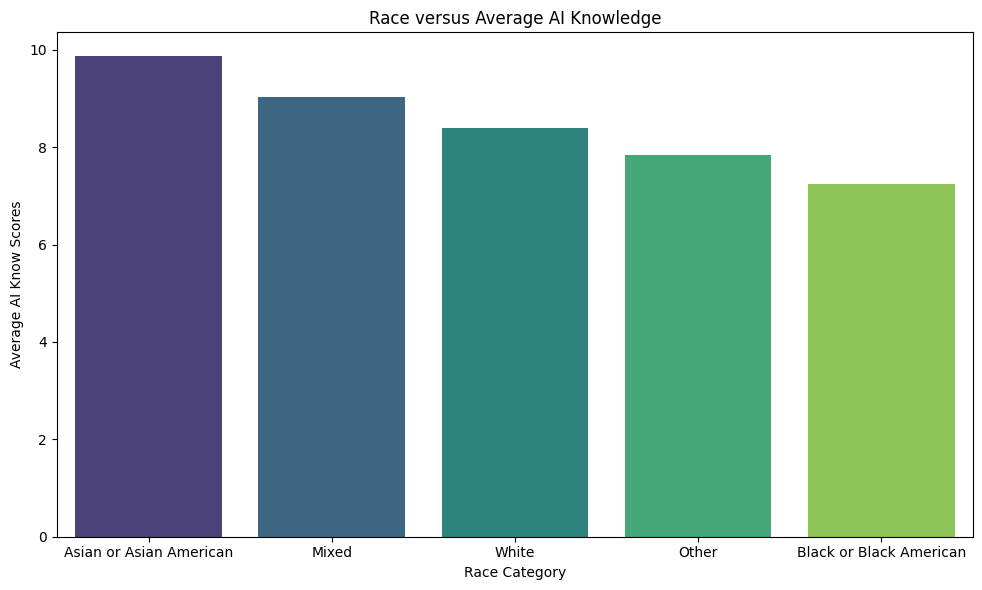

In [47]:
# Race vs AIKNOW_INDEX_W119
avg_race_score = master_dataset.groupby('F_RACECMB')['SCORES'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='F_RACECMB', y='SCORES', data=avg_race_score, palette='viridis')
plt.title('Race versus Average AI Knowledge')
plt.xlabel('Race Category')
plt.ylabel('Average AI Know Scores')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\3859474435.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment_Label', y='SCORES', data=avg_employment, palette='viridis')


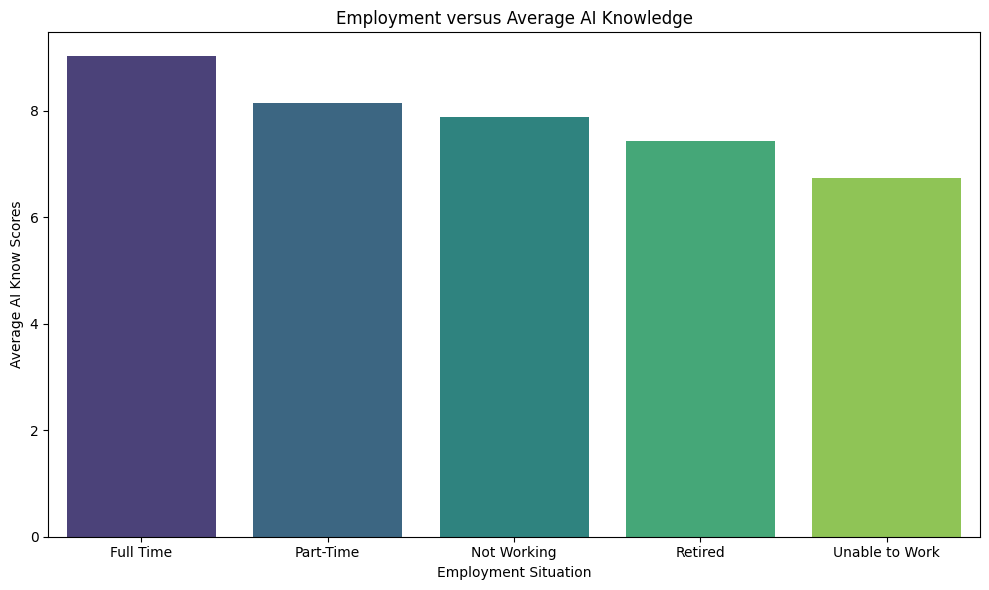

In [48]:
# EmplSit vs AIKNOW_INDEX_W119

emplsit_map = {1: "Full Time", 2:"Part-Time", 3:"Not Working", 4:"Unable to Work", 5:"Retired"}

# Calculate average AI Knowledge Score by Employment Status
avg_employment = master_dataset.groupby('EMPLSIT_W119')['SCORES'].mean().sort_values(ascending=False).reset_index()

avg_employment['Employment_Label'] = avg_employment['EMPLSIT_W119'].map(emplsit_map)
plt.figure(figsize=(10, 6))
sns.barplot(x='Employment_Label', y='SCORES', data=avg_employment, palette='viridis')
plt.title('Employment versus Average AI Knowledge')
plt.xlabel('Employment Situation')
plt.ylabel('Average AI Know Scores')
plt.tight_layout()
plt.show()

In [49]:
# --------------------- RESKILL/ADAPTABILITY --------------------- # 

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2976590247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AIWRKH4_W119', y='SCORES', data=master_dataset, palette='viridis')


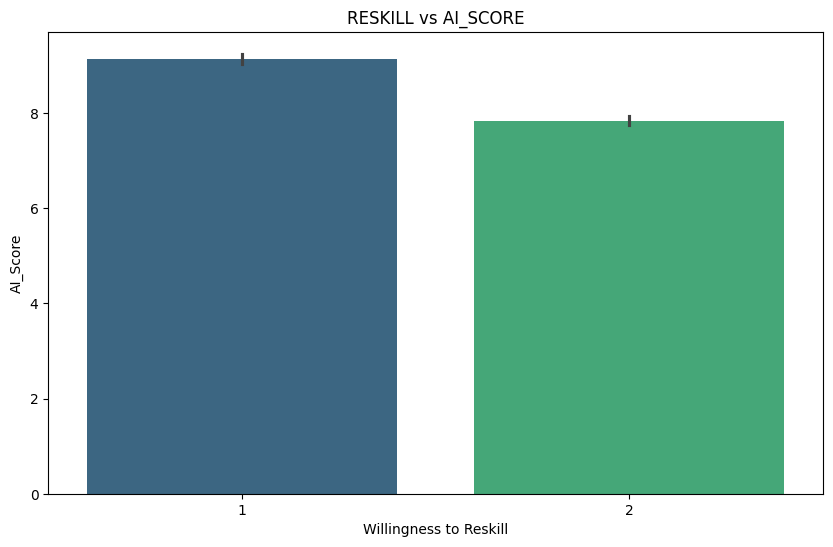

In [50]:
# Reskill vs Ai Scores 
reskill_vs_aiscore = master_dataset.groupby('AIWRKH4_W119')['SCORES'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='AIWRKH4_W119', y='SCORES', data=master_dataset, palette='viridis') 
plt.title('RESKILL vs AI_SCORE')
plt.xlabel('Willingness to Reskill')
plt.ylabel('AI_Score')
plt.show() 

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\3867115741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_RACECMB', y='adaptability_index_new', data=ordered_race, palette='viridis')


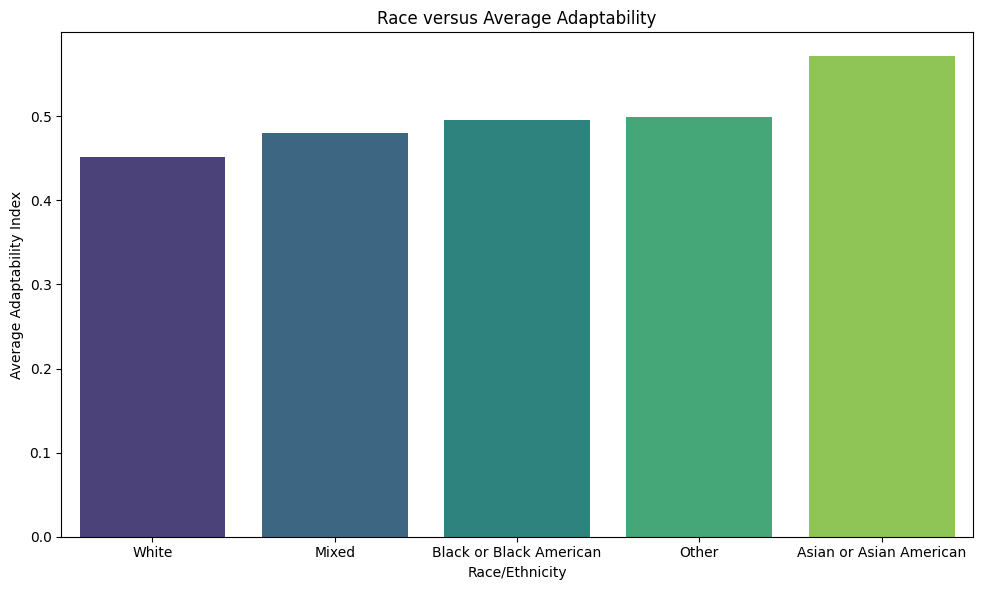

In [51]:
# Race vs Adaptability Index
ordered_race = master_dataset.groupby('F_RACECMB')['adaptability_index_new'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='F_RACECMB', y='adaptability_index_new', data=ordered_race, palette='viridis')
plt.title('Race versus Average Adaptability')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Adaptability Index')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2103128980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_GENDER', y='adaptability_index_new', data=ordered_gender, palette='viridis')


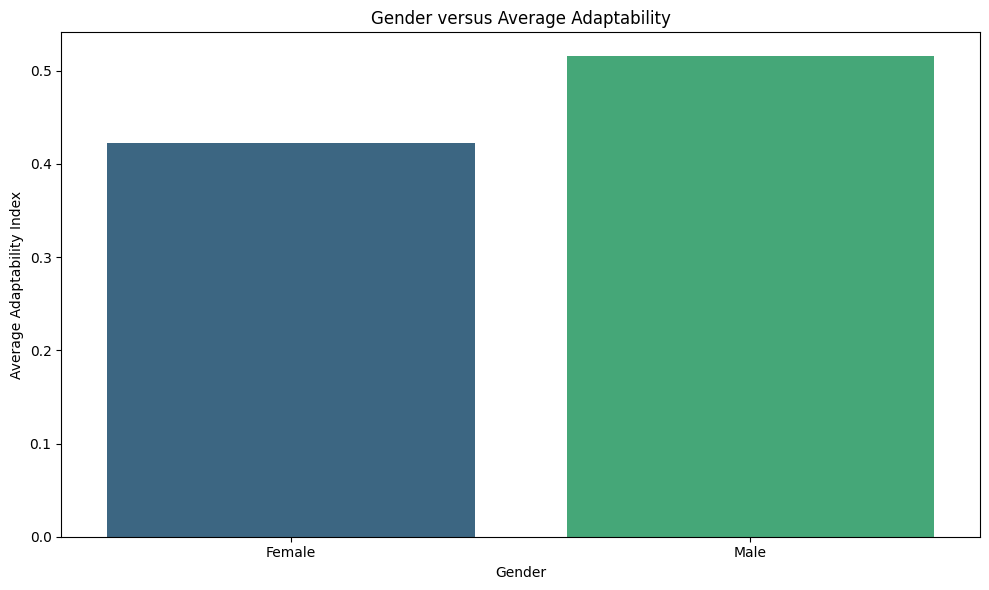

In [52]:
# Gender vs Adaptability Index
ordered_gender = master_dataset.groupby('F_GENDER')['adaptability_index_new'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='F_GENDER', y='adaptability_index_new', data=ordered_gender, palette='viridis')
plt.title('Gender versus Average Adaptability')
plt.xlabel('Gender')
plt.ylabel('Average Adaptability Index')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\1374706180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_EDUCCAT', y='adaptability_index_new', data=ordered_education, palette='viridis')


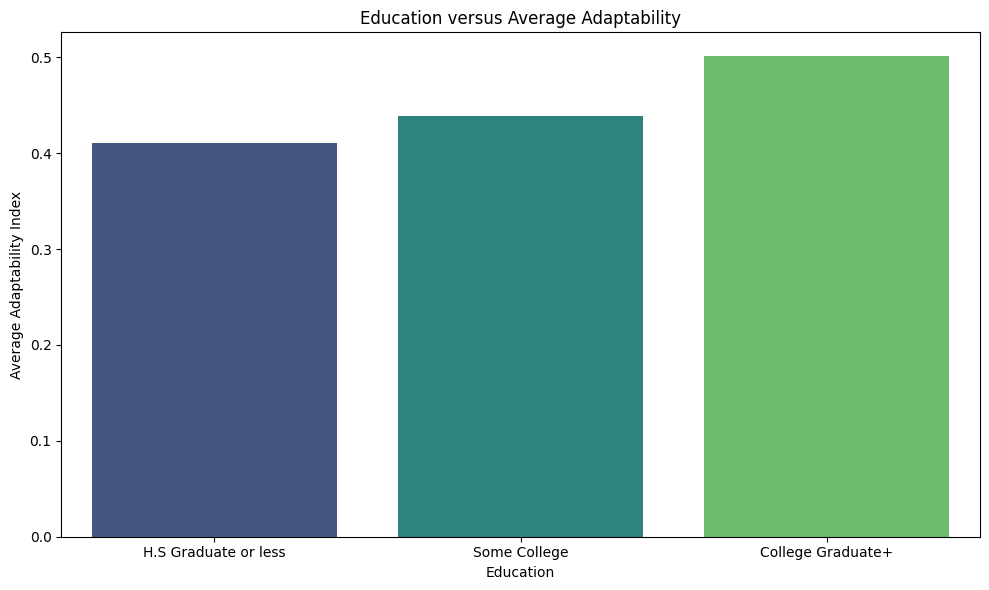

In [53]:
# Education vs Adaptability Index
ordered_education = master_dataset.groupby('F_EDUCCAT')['adaptability_index_new'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='F_EDUCCAT', y='adaptability_index_new', data=ordered_education, palette='viridis')
plt.title('Education versus Average Adaptability')
plt.xlabel('Education')
plt.ylabel('Average Adaptability Index')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\3362013352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F_AGECAT', y='adaptability_index_new', data=ordered_age, palette='viridis')


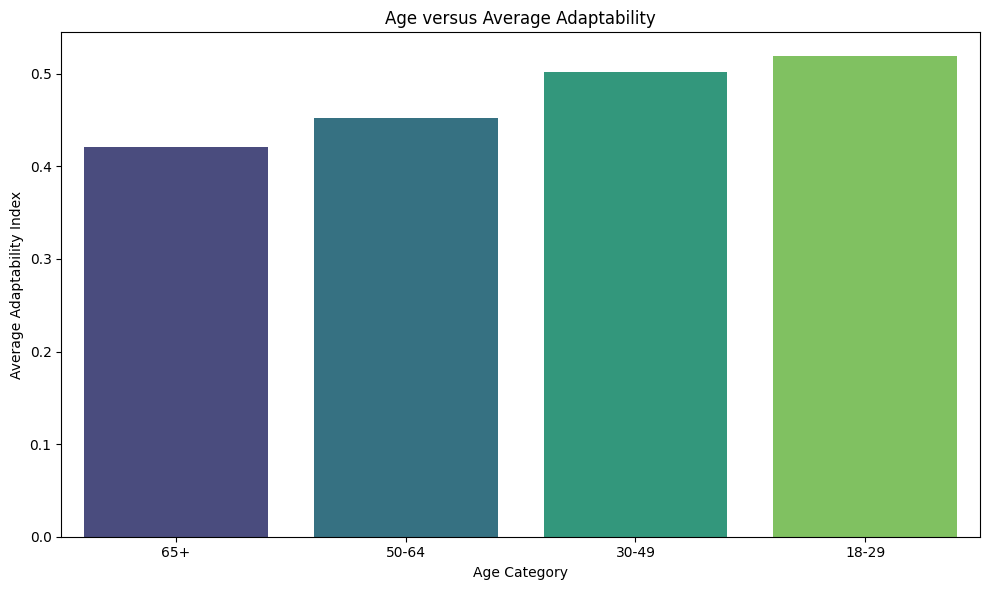

In [54]:
# Age vs Adaptability Index
ordered_age = master_dataset.groupby('F_AGECAT')['adaptability_index_new'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='F_AGECAT', y='adaptability_index_new', data=ordered_age, palette='viridis')
plt.title('Age versus Average Adaptability')
plt.xlabel('Age Category')
plt.ylabel('Average Adaptability Index')
plt.tight_layout()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2958584917.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment_Label', y='adaptability_index_new', data=ordered_emplsit, palette='viridis')


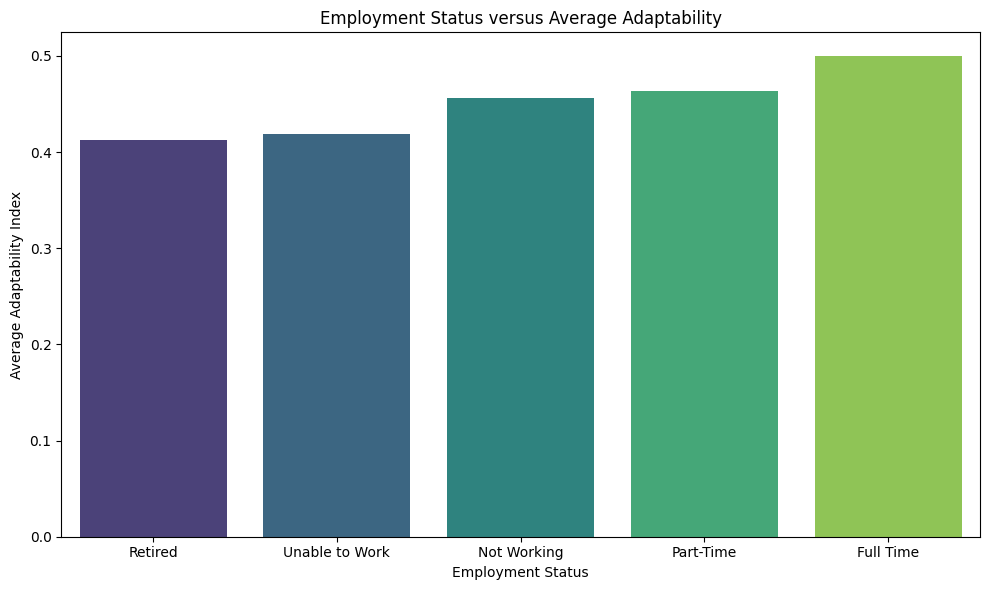

In [55]:
# Employment Status vs Adaptability Index
emplsit_map = {1: "Full Time", 2:"Part-Time", 3:"Not Working", 4:"Unable to Work", 5:"Retired"} 
ordered_emplsit = master_dataset.groupby('EMPLSIT_W119')['adaptability_index_new'].mean().sort_values(ascending=True).reset_index()

# Map numeric codes to labels for better x-axis
ordered_emplsit['Employment_Label'] = ordered_emplsit['EMPLSIT_W119'].map(emplsit_map)

plt.figure(figsize=(10, 6))
sns.barplot(x='Employment_Label', y='adaptability_index_new', data=ordered_emplsit, palette='viridis')
plt.title('Employment Status versus Average Adaptability')
plt.xlabel('Employment Status')
plt.ylabel('Average Adaptability Index')
plt.tight_layout()
plt.show()

In [56]:
# ------------------------- MODEL PREPARATION  ------------------------- #

# PRE-ORDINAL ENCODING
cncexc_order = {
    1: 2,  # More excited -> highest score
    2: 0,  # More concerned -> lowest score
    3: 1   # Equal -> middle score
}

useai_order = {
    1: 5,
    2: 4,
    3: 3,
    4: 2,
    5: 1
}

# Apply ordinal encoding
data['CNCEXC_W119'] = data['CNCEXC_W119'].map(cncexc_order)
data['USEAI_W119'] = data['USEAI_W119'].map(useai_order)

# FEATURE DEFINITIONS 
features = [
    'F_AGECAT', 'F_EDUCCAT', 'F_RACECMB', 'F_GENDER',  # Demographics
    'EMPLSIT_W119',           # Employment status
    'SCORES', 'CNCEXC_W119',  # AI awareness
    'USEAI_W119'              # AI attitudes
]
target = 'adaptability_binary_new'

# MAIN_DF 
df = data[features + [target]].copy() 

In [57]:
# ----- ORDINAL ENCODING ---- #

agecat = {1: "18-29", 2:"30-49", 3:"50-64", 4 :"65+"}
education = {1: "College Graduate+", 2:"Some College", 3:"H.S Graduate or less"}  

df['F_EDUCCAT_str'] = df['F_EDUCCAT'].map({1: "College Graduate+", 2: "Some College", 3: "H.S Graduate or less"})
df['F_AGECAT_str'] = df['F_AGECAT'].map({1: "18-29", 2: "30-49", 3: "50-64", 4: "65+"})

agecat_order = ['18-29', '30-49', '50-64', '65+']
education_order = ['H.S Graduate or less', 'Some College', 'College Graduate+']
ordinal_categories = [education_order, agecat_order]

encoder = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)
df[['F_EDUCCAT_encoded', 'F_AGECAT_encoded']] = encoder.fit_transform(df[['F_EDUCCAT_str', 'F_AGECAT_str']])

df = df.drop(['F_EDUCCAT_str', 'F_AGECAT_str', 'F_AGECAT', 'F_EDUCCAT'], axis=1) 


In [58]:
# ----- DATA CLEANING ---- #

# Handle missing values (replace 99 or similar codes with NaN and drop rows)
def replace_noanswer(df, col, noanswer_codes=[99]):
    df[col] = df[col].apply(lambda x: np.nan if x in noanswer_codes else x)
    return df

# Only apply to columns that exist in df
for col in [c for c in features + [target] if c in df.columns]:
    df = replace_noanswer(df, col)
df = df.dropna()

In [59]:
# ----- NOMINAL ONE-HOT ENCODING ---- #

categorical_cols = [col for col in features if col not in ['F_AGECAT', 'F_EDUCCAT', 'SCORES', 'F_EDUCCAT_encoded', 'F_AGECAT_encoded', 'CNCEXC_W119','USEAI_W119']]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [60]:
# ----- TRAIN/TEST SPLIT & PARAMETERS ---- #

# Split features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# ----- RANDOM FOREST MODEL ---- #
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nTop 10 Most Important Features:\n", feature_importance_df.head(10))

# Interpretation
print("\nInterpretation:")
print("The model predicts willingness to adapt to AI (apply to AI-using employers) with reasonable accuracy.")
print("Key features indicate which segments are at risk: lower AI awareness (AI_HEARD), less education (F_EDUCCAT),")
print("and unemployment (EMPLSIT) may suggest higher risk of being left behind.")

Accuracy: 0.6835156544700113

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      1743
           1       0.55      0.43      0.48       908

    accuracy                           0.68      2651
   macro avg       0.64      0.62      0.63      2651
weighted avg       0.67      0.68      0.67      2651


Top 10 Most Important Features:
               Feature  Importance
0              SCORES    0.295234
2          USEAI_W119    0.159765
1         CNCEXC_W119    0.154557
4    F_AGECAT_encoded    0.098247
3   F_EDUCCAT_encoded    0.072866
9        F_GENDER_2.0    0.044932
5       F_RACECMB_2.0    0.031887
11   EMPLSIT_W119_2.0    0.026917
14   EMPLSIT_W119_5.0    0.023742
12   EMPLSIT_W119_3.0    0.022500

Interpretation:
The model predicts willingness to adapt to AI (apply to AI-using employers) with reasonable accuracy.
Key features indicate which segments are at risk: lower AI awareness (AI_HEARD), less educat

In [62]:
# ----- HYPERPARAMETER TUNING ---- #

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\Mik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy: 0.7234664503011797


In [63]:
# ----- LOGISTIC REGRESSIONS MODEL ---- #
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Report:\n", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81      1743
           1       0.66      0.38      0.49       908

    accuracy                           0.72      2651
   macro avg       0.70      0.64      0.65      2651
weighted avg       0.71      0.72      0.70      2651

Accuracy Report:
 0.7223689173896642


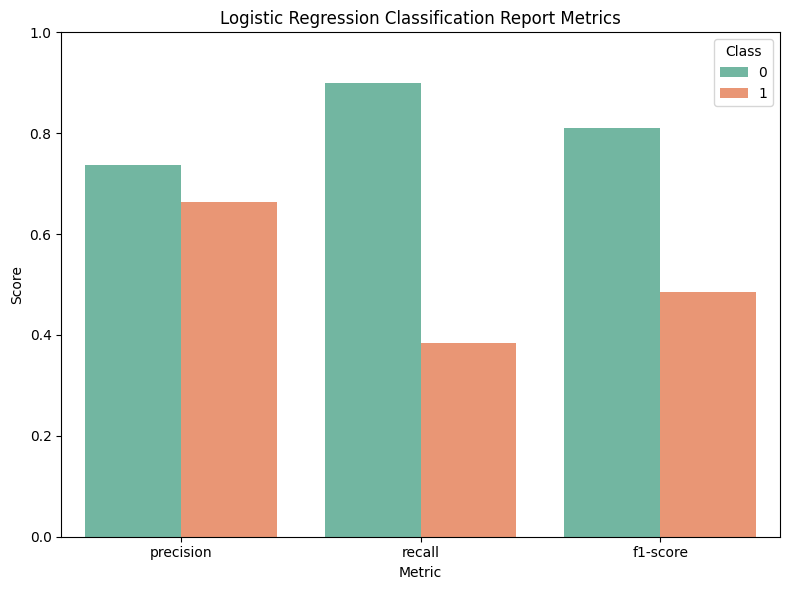

In [64]:
# ------------------------- ANALYSIS & FINDINGS  ------------------------- #

# LOGISTICS REGRESSION ANALYSIS
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Select only the classes (0 and 1) and metrics
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

# Prepare data for plotting
plot_data = []
for cls in classes:
    for metric in metrics:
        plot_data.append({
            'Class': cls,
            'Metric': metric,
            'Score': report_dict[cls][metric]
        })

plot_df = pd.DataFrame(plot_data)

# Create a grouped barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=plot_df, palette='Set2')
plt.ylim(0, 1)
plt.title('Logistic Regression Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

In [65]:
# MODEL FIT CHECK 
y_pred_proba = log_reg.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"ROC AUC Score (binary): {roc_auc:.4f}")

from sklearn.metrics import average_precision_score

# Calculate PR AUC Score 
y_pred_proba = log_reg.predict_proba(X_test)
pr_auc = average_precision_score(y_test, y_pred_proba[:, 1])
print(f"PR AUC Score (average precision): {pr_auc:.4f}")

ROC AUC Score (binary): 0.7425
PR AUC Score (average precision): 0.6121


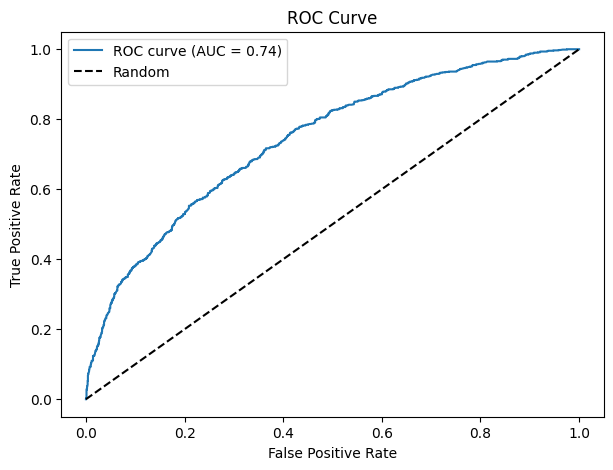

In [66]:
# ROC GRAPH 
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\1815833322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


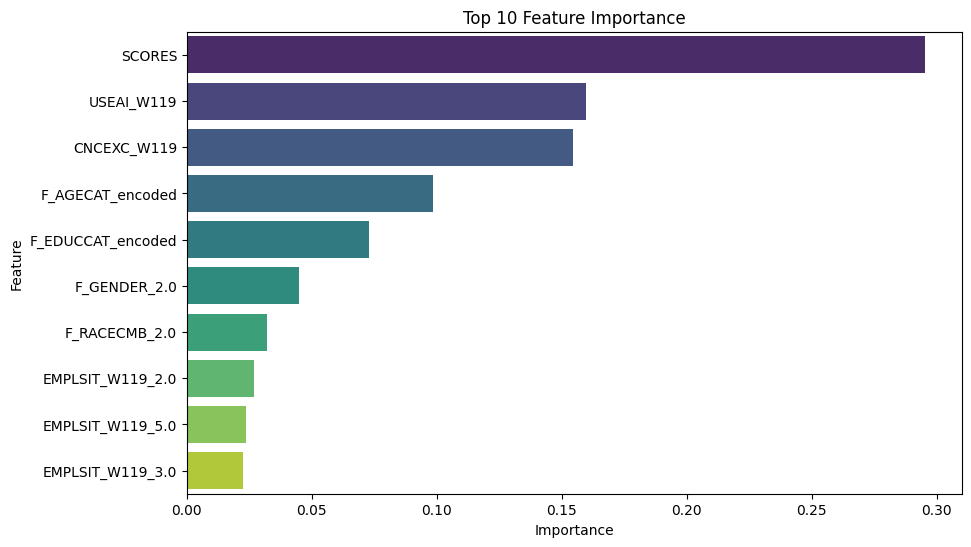

In [67]:
# FEATURE IMPORTANCE 
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

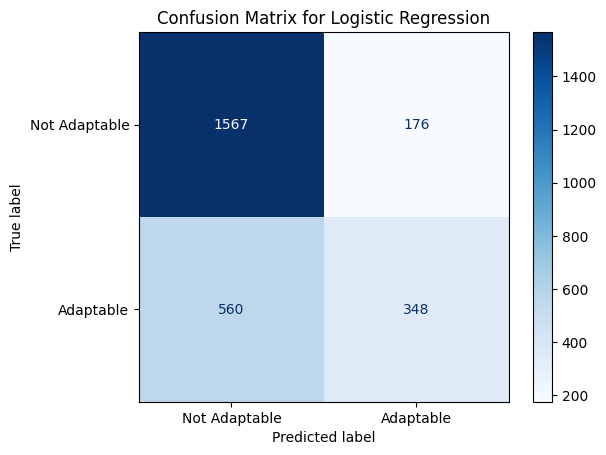

In [68]:
# CONFUSION MATRIX 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Adaptable', 'Adaptable'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

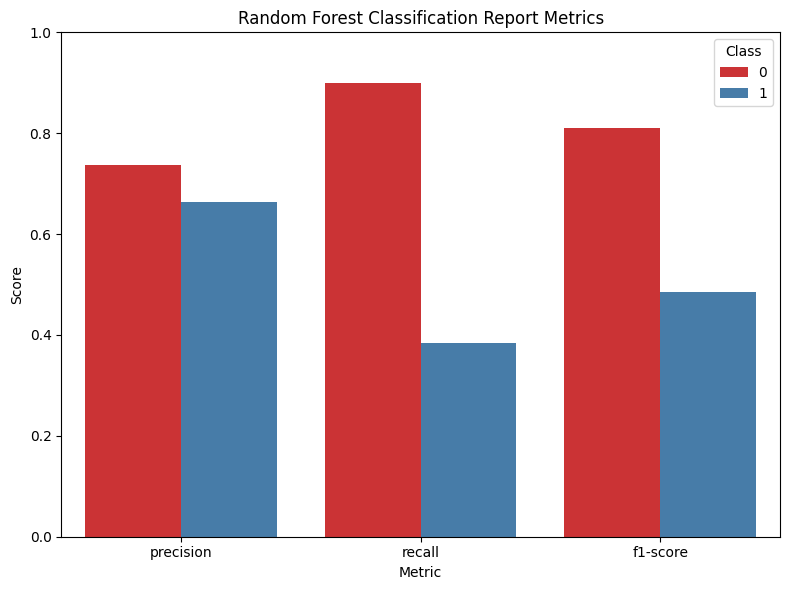

C:\Users\Mik\AppData\Local\Temp\ipykernel_40120\2725901627.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette=['#2E8B57'])


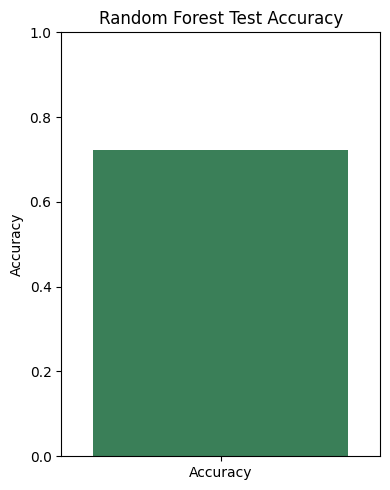

In [69]:
# RANDOM FOREST TREE 
rf_report_dict = classification_report(y_test, y_pred, output_dict=True)

# Select only the classes (0 and 1) and metrics
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

# Prepare data for plotting
rf_plot_data = []
for cls in classes:
    for metric in metrics:
        rf_plot_data.append({
            'Class': cls,
            'Metric': metric,
            'Score': rf_report_dict[cls][metric]
        })

rf_plot_df = pd.DataFrame(rf_plot_data)

# Create a grouped barplot for Random Forest metrics
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', hue='Class', data=rf_plot_df, palette='Set1')
plt.ylim(0, 1)
plt.title('Random Forest Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

# Plot accuracy as a separate bar
plt.figure(figsize=(4, 5))
accuracy = rf_report_dict['accuracy']
sns.barplot(x=['Accuracy'], y=[accuracy], palette=['#2E8B57'])
plt.ylim(0, 1)
plt.title('Random Forest Test Accuracy')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [70]:
# PREDICTIONS FOR PROFILES 

# Define the profiles as a list of dictionaries
profiles_data = [
    {'SCORES': 4.0, 'CNCEXC_W119': 2, 'USEAI_W119': 5, 'F_AGECAT_encoded': 1, 'F_EDUCCAT_encoded': 2, 'F_RACECMB_2.0': 0, 'F_RACECMB_3.0': 0, 'F_RACECMB_4.0': 0, 'F_RACECMB_5.0': 0, 'F_GENDER_2.0': 0, 'F_GENDER_3.0': 0, 'EMPLSIT_W119_2.0': 0, 'EMPLSIT_W119_3.0': 0, 'EMPLSIT_W119_4.0': 0, 'EMPLSIT_W119_5.0': 0},
    {'SCORES': 1.5, 'CNCEXC_W119': 0, 'USEAI_W119': 1, 'F_AGECAT_encoded': 0, 'F_EDUCCAT_encoded': 0, 'F_RACECMB_2.0': 1, 'F_RACECMB_3.0': 0, 'F_RACECMB_4.0': 0, 'F_RACECMB_5.0': 0, 'F_GENDER_2.0': 1, 'F_GENDER_3.0': 0, 'EMPLSIT_W119_2.0': 0, 'EMPLSIT_W119_3.0': 1, 'EMPLSIT_W119_4.0': 0, 'EMPLSIT_W119_5.0': 0},
    {'SCORES': 2.5, 'CNCEXC_W119': 1, 'USEAI_W119': 3, 'F_AGECAT_encoded': 3, 'F_EDUCCAT_encoded': 1, 'F_RACECMB_2.0': 0, 'F_RACECMB_3.0': 1, 'F_RACECMB_4.0': 0, 'F_RACECMB_5.0': 0, 'F_GENDER_2.0': 0, 'F_GENDER_3.0': 0, 'EMPLSIT_W119_2.0': 0, 'EMPLSIT_W119_3.0': 0, 'EMPLSIT_W119_4.0': 0, 'EMPLSIT_W119_5.0': 1}
]

profiles_df = pd.DataFrame(profiles_data)
profiles_df = profiles_df[X_train.columns]

rf_predictions = rf.predict(profiles_df)
rf_probabilities = rf.predict_proba(profiles_df)[:, 1]

print("--- Customer Profile Predictions ---")
for i, profile in enumerate(profiles_data):
    adaptability = "High" if rf_predictions[i] == 1 else "Low"
    print(f"\nProfile {i+1}:")
    print(f"  → Predicted AI Knowledge Score: {profile['SCORES']}")
    print(f"  → Predicted Adaptability Category: {adaptability}")
    print(f"  → Probability of High Adaptability: {rf_probabilities[i]:.2f}")



--- Customer Profile Predictions ---

Profile 1:
  → Predicted AI Knowledge Score: 4.0
  → Predicted Adaptability Category: High
  → Probability of High Adaptability: 0.85

Profile 2:
  → Predicted AI Knowledge Score: 1.5
  → Predicted Adaptability Category: High
  → Probability of High Adaptability: 0.77

Profile 3:
  → Predicted AI Knowledge Score: 2.5
  → Predicted Adaptability Category: Low
  → Probability of High Adaptability: 0.17


In [71]:
# ------------------------- END ------------------------- #